# BF550
## Dylan Tamayo

In [1]:
import numpy as np
# np.random.seed(20221110)
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

In [34]:
class Treatment_Trial:
    """
    A class for simulating trials between control and treated samples,
    calculating statistical significance between samples, and plotting
    likelihood of reaching stastical significance.
    """
    def __init__(self, n, alpha, control_p, treated_p):
        self.n = n
        self.alpha = alpha
        self.control_p = control_p
        self.treated_p = treated_p
    
    # Get/set functions for retrieving/altering initial parameters.
    def get_n(self):
        return self.n
    
    def set_n(self, new_n):
        self.n = new_n
    
    def get_alpha(self):
        return self.alpha
    
    def set_alpha(self, new_alpha):
        self.alpha = new_alpha

    def get_control_p(self):
        return self.control_p
    
    def set_control_p(self, new_control_p):
        self.control_p = new_control_p

    def get_treated_p(self):
        return self.treated_p
    
    def set_treated_p(self, new_treated_p):
        self.treated_p = new_treated_p

    def __str__(self):
        return (f'n = {self.n}, alpha = {self.alpha}\n' \
                f'control probability = {self.control_p}, ' \
                f'treated probability = {self.treated_p}'
                )

    def generate_samples(self, sample_size, probability):
        '''Generate an array of binary outcomes based on parameters.

        sample_size: int, an integer greater than 0
        probability: a list of two decimals whose sum is one. The second number
            is the probability of an outcome of 1 (infected).
        '''
        outcomes = np.array([0,1])        
        samples = np.random.choice(outcomes, size=sample_size, p=probability)

        return samples

    def permutation_test(self, control_samples, treated_samples, num_splits):
        '''Conduct a permutation test of two samples, repeated num_splits times.'''
        differences = np.zeros(num_splits)

        # Combine treated and control samples.
        combined_samples = np.concatenate((treated_samples, control_samples),
                                          axis=0)
        permutation = combined_samples.copy()
        
        # Shuffle combined samples and record differences between means.
        for i in range(num_splits):
            np.random.shuffle(permutation)
            treated_length = len(treated_samples)
            fake_treated = permutation[:treated_length]
            fake_control = permutation[treated_length:]
            differences[i] = np.mean(fake_treated) - np.mean(fake_control)
        
        return differences

    def sig_test(self, n, alpha, trials):
        '''Calculate the probability that a permutation test between control
        and treated samples of size n will be under alpha.

        trials: int, number of times a 1000-permutation test is repeated
        '''
        percent_under_sig = np.zeros(trials)

        for i in range(trials):
            # Generate samples and conduct permutation test.
            control = self.generate_samples(n, self.control_p)
            treated = self.generate_samples(n, self.treated_p)

            # Calculate p_value from percentage of permutation tests under
            # observed difference.
            observed_difference = np.mean(treated) - np.mean(control)
            diff = self.permutation_test(control, treated, 1000)
            p_value = np.sum(diff <= observed_difference)/diff.size

            if p_value < alpha:
                percent_under_sig[i] = 1

        # Average percentage under alpha for several trials.       
        percent_sig = np.sum(percent_under_sig)/percent_under_sig.size
        return percent_sig
    
    def plot_sig(self, max_n, number_trials):
        '''Iterate over values of n until max_n, plotting the probability
        a permutation test for sample sizes of n is under alpha'''
        
        # Shift starting sample size from 0 to 1.
        n_shifted = max_n+1
        sig_range = np.zeros(max_n)
        
        # For each n, average the results of several significance tests
        # and convert from frequency to percentage.
        for n in range(1, n_shifted):
            sig_avg = [self.sig_test(n, self.alpha, number_trials)
                       for i in range(10)]
            sig_avg = np.mean(np.array(sig_avg), axis=0)
            sig_range[n-1] = sig_avg * 100
        
        # Plot % likelihood of significance under alpha per n.
        x = np.array(range(1, n_shifted))
        plt.plot(x, sig_range)
        plt.xticks(np.arange(0, n_shifted, step=5))
        plt.yticks(np.arange(0, 110, step=10))

        plt.xlabel('N samples per treatment arm')
        plt.ylabel(f'% of p-values < ${self.alpha}$')
        title = (f'Probability of statistically significant difference ' \
            f'at $\\alpha = 0.05$\n' \
            f'$P_c = {self.control_p[1]}, P_v = {self.treated_p[1]}$')
        plt.title(title)

        plt.show

        return
    
    def simulate_trials(self, number_trials):
        '''Run significance tests for number_trials for sample sizes of n,
        calculate the percent likelihood of a test under alpha, and plot the results.
        '''

        # Shift n for plotting purposes.
        n_shifted = number_trials + 1

        # Run several significance tests and calculate the percent likelihood of
        # a p-value under alpha.
        trial_outcome = np.array([self.sig_test(self.n, self.alpha, 10)
                                  for i in range(number_trials)])
        print(f'Average percent likelihood of p-value < {self.alpha}: ' \
            f'{np.mean(trial_outcome)*100}')
        
        # Plot % likelihood of significance under alpha for each trial.
        x = np.array(range(1, n_shifted))
        plt.plot(x, trial_outcome)
        plt.xticks(np.arange(0, n_shifted, step=10))
        plt.yticks(np.arange(0, 1.1, step=0.1))

        plt.xlabel(f'Trials at $N={self.n}$')
        plt.ylabel(f'% of p-values < ${self.alpha}$')
        title = (f'Probability of statistically significant difference ' \
            f'at $\\alpha = 0.05$\n' \
            f'$P_c = {self.control_p[1]}, P_v = {self.treated_p[1]}$')
        plt.title(title)

        plt.show

        return
        
trial = Treatment_Trial(10, 0.05, [0.5,0.5], [0.9,0.1])

In [9]:
print(trial)

n = 10, alpha = 0.05
control probability = [0.5, 0.5], treated probability = [0.9, 0.1]


In [12]:
control_sample = trial.generate_samples(trial.get_n(), trial.get_control_p())
treated_sample = trial.generate_samples(trial.get_n(), trial.get_treated_p())
print(control_sample, treated_sample)

[1 1 1 1 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0]


In [22]:
trial.permutation_test(control_sample, treated_sample, 10)

array([-0.2,  0.6,  0.2, -0.4,  0.4,  0.2,  0. ,  0. ,  0. ,  0. ])

In [80]:
trial.sig_test(trial.n, trial.alpha, 100)

0.5

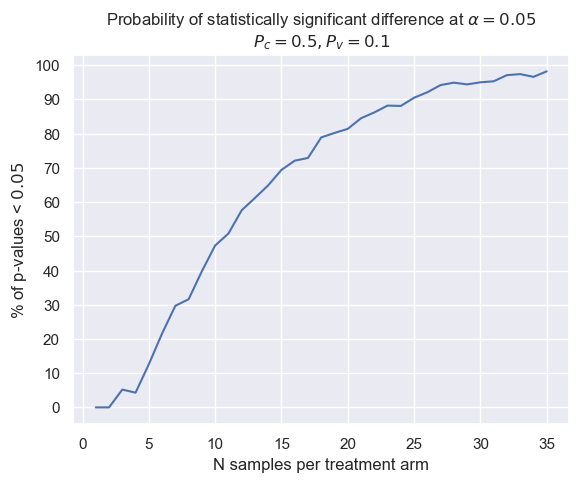

In [83]:
trial.plot_sig(35,100)

Average percent likelihood of p-value < 0.05: 90.2


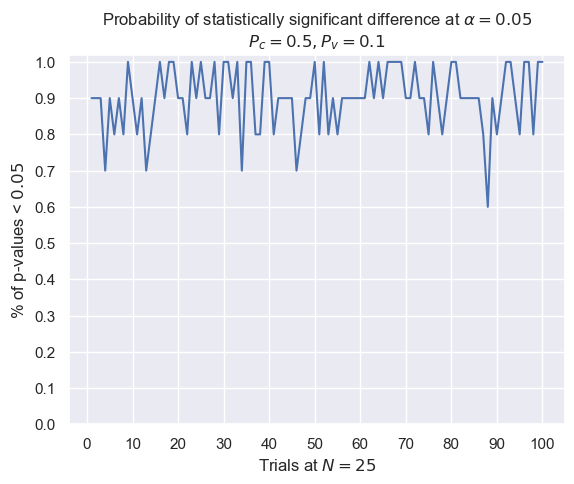

In [101]:
# Sample size of around 24-25 will yield ~90% likelihood of a significant
# difference between control and treated arms under alpha = 0.05.
trial.set_n(25)
trial.simulate_trials(100)